# Project AI

Nombre: Juan David Valencia

**Identify the geometric figure in the photograph. This is a simple supervised learning problem.**

#### Import the necessary general libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from rich.progress import track

#### Images Libraries

In [2]:
import cv2 as cv
from scipy import ndimage

In [3]:
%matplotlib inline

#### Example of read a single image

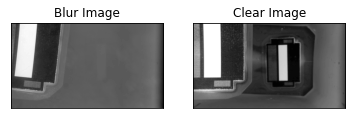

In [4]:
img = cv.imread('9.9_b.png',0)
img2 = cv.imread('0.0_a.png', 0)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('Clear Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Representation

To represent the images the best way to do it in my opinion is the edges for the following reasons:
- Eliminates a lot of the noise generated by the blur of the photograph, the color of the shape (white, grey or white). 
- Reduces the information to the minimum necessary to solve the problem (Grey scale to black/white images)

Also let's add a **blur effect** and **resizing** to eliminate more noise of the information (and standarize the input to the models)

### Example of the representation

**Representation of blur image** 

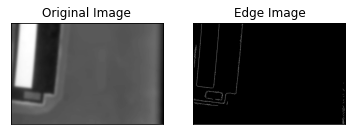

In [5]:
img = cv.imread('9.9_b.png',0)
img = cv.resize(img, (720, 480), interpolation = cv.INTER_AREA)
img = ndimage.gaussian_filter(img, sigma= 5.11)
edges = cv.Canny(img,15, 20)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

**Representation of clear image**

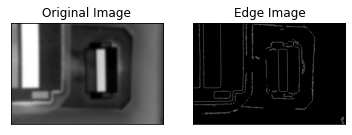

In [6]:
img = cv.imread('0.0_a.png',0)
img = cv.resize(img, (720, 480), interpolation = cv.INTER_AREA)
img = ndimage.gaussian_filter(img, sigma= 5.11)
edges = cv.Canny(img,15, 20)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Get the images into a single Array to feed in the training

In [7]:
import glob

forms_paths = glob.glob('new_db/*')
data = {
    'data': [],
    'label': []
}

# Get the images and apply the representation
for path in forms_paths:
    files_names = glob.glob( os.path.join( path, '*' ) )
    for file in files_names:
        img = cv.imread(file,0)
        img = cv.resize(img, (720, 480), interpolation = cv.INTER_AREA)
        img = ndimage.gaussian_filter(img, sigma= 5.11)
        edges = cv.Canny(img,15, 20)
        
        label = path.split('/')[-1]
        data['data'].append(edges.flatten().T)
        data['label'].append(label)

In [8]:
X = np.array(data['data'], dtype=object) # Get the complete features
Y = np.array(data['label'], dtype=object) # Get the labels

Reducing the information and noise (resize, blur and edge detection) we eliminate the need to consider an specific separation for the non-independent feature of the data

**Note: We are using simple models that don't need parameter optimization so we only need training dataset and a test dataset**

## Model Training

### Import necessary libraries

In [9]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Random Forest Classifier

In [11]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);

In [12]:
rfc.score(X_test, y_test)

0.963963963963964

### Support Vector Machine
Through Support Vector Classification

In [13]:
svc = svm.SVC()
svc.fit(X_train, y_train);

In [14]:
svc.score(X_test, y_test)

0.9369369369369369

### Stochastic Gradient Descent

In [15]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train);

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [16]:
sgd.score(X_test, y_test)

1.0

### Gaussian Naive Bayes

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);

In [18]:
gnb.score(X_test, y_test)

0.978978978978979

### Best result

I found that the best classifier was the Stochastic Gradient Descent. But with an unexpected perfect score, which seems doubtful...So I repeated the problem and the division of data multiple times to confirm this score.

In [21]:
results = []
for i in track(range(10)):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    sgd.fit(X_train, y_train);
    results.append(sgd.score(X_test, y_test))
    
print(np.mean(results))

Output()

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

/home/amicis/.anaconda3/envs/un/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_
gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. 
Consider increasing max_iter to improve the fit.
  warnings.warn(

0.997897897897898


Pretty cool score if I'm honest (Definitely SGD is the most simplest and effective algorithm for this problem)

In [22]:
y_pred = sgd.predict(X_test);

### Confusion Matrix of best Model

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_pred, y_test)

array([[100,   0,   0],
       [  0, 118,   0],
       [  0,   0, 115]])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set_theme(style="dark")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

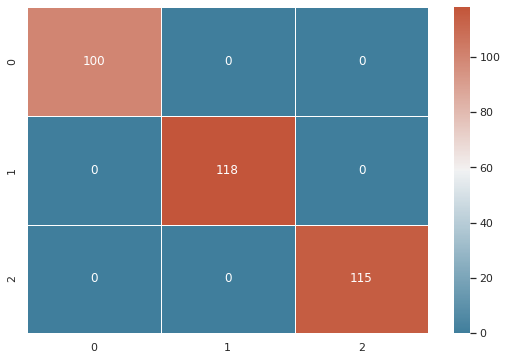

In [27]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap=cmap, fmt="d", linewidths=.5, ax=ax);